# 1 3 5 - Jack
# 2 4 - Jayden

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [15]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [16]:
train = pd.read_csv("./classify/TrainData1.txt", header=None, sep='\t')
target = pd.read_csv("./classify/TrainLabel1.txt",header=None, sep='\t')
train
test = pd.read_csv("./classify/TestData1.txt",header=None, sep='\t')
X, y = train.values, target.values.flatten()

<Axes: xlabel='std', ylabel='Count'>

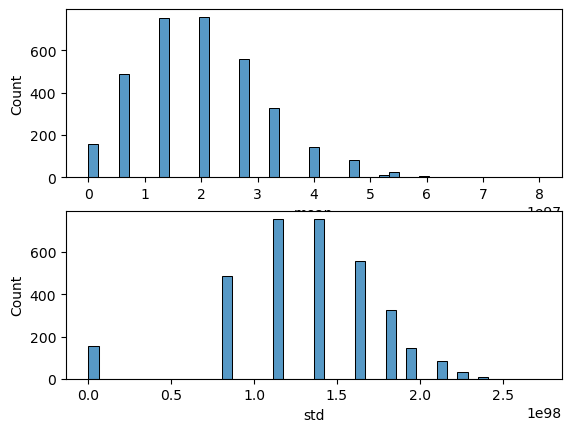

In [27]:
stats = train.describe().T
fig, (ax1, ax2) = plt.subplots(2,1)

sns.histplot(stats['mean'], ax=ax1)
sns.histplot(stats['std'], ax=ax2)


In [18]:
print("Missing value count:",  train.isna().sum().sum())
print("Number of categories:",(len(target[0].unique())))


Missing value count: 0
Number of categories: 5


In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
# from sklearn.decomposition import PCA
# train_test_split

# n=150
# # do PCA dim reduction to 5
# pca = PCA(n_components=n)
# pca_evr = pca.fit(scale(train))

# pca_evr = (pca.explained_variance_ratio_)



# pca_evr = np.concatenate((np.zeros(1), pca_evr))
# plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title("PCA - Cumulative Explained Variance Ratio")
# plt.grid()
# print(np.cumsum(pca_evr))

In [28]:
clf = Pipeline([
  ('classification', RandomForestClassifier())
])
# clf.fit(train.values, target.values.flatten())
# Test Random Forest
scores = cross_val_score(clf, X, y, cv=5)
scores


c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([0.86666667, 0.93333333, 0.86666667, 0.9       , 0.9       ])

In [23]:
# clf.predict(test.values)

In [ ]:
# clf = LassoCV().fit(X, y)
# importance = np.abs(clf.coef_)
# idx_third = importance.argsort()[-3]
# threshold = importance[idx_third] + 0.01

# idx_features = (-importance).argsort()[:2]
# # name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(idx_features))

# sfm = SelectFromModel(clf, threshold=threshold)
# sfm.fit(X, y)
# X_transform = sfm.transform(X)

# n_features = sfm.transform(X).shape[1]

In [33]:

# knn = KNeighborsClassifier(7, p=3000, weights='distance',n_jobs = -1)
# knn.fit( MinMaxScaler(feature_range=(0, 1)).fit_transform(train.values), target.values)
knn = Pipeline(
    [
        ("Scaler", MinMaxScaler(feature_range=(0, 1))),
        ("KNN", KNeighborsClassifier(11, p=3000, weights='distance',n_jobs = -1)),
    ]
)
# score = cross_val_score(knn, MinMaxScaler(feature_range=(0, 1)).fit_transform(X), y, cv=3)
score = cross_val_score(knn, X, y, cv=5)
score

c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([0.1       , 0.73333333, 0.73333333, 0.7       , 0.7       ])